# Neighborhoods and boroughs of Riga and Toronto. Comparative analysis.

## Importing the necessary libraries

In [31]:
!pip install beautifulsoup4
!pip install lxml
import requests
import pandas as pd
import numpy as np
import random

from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed!')
print('Libraries imported!')

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Solving environment: done

# All requested packages already installed.

Folium installed!
Li

## Getting data about the boroughs and neighborhoods of Riga

In [32]:
# The basic information will be gathered from wikipedia and converted into a dataframe
Riga_source = requests.get('https://lv.wikipedia.org/wiki/R%C4%ABgas_apkaimju_uzskait%C4%ABjums').text
soup=BeautifulSoup(Riga_source,'lxml')
table=soup.find('table')
riga_df = pd.read_html(str(table))
r_df = pd.DataFrame(riga_df[0])
r_df.head()

,Attēls,Apkaime,ApkaimesnovietojumsRīgā,Platība (km²),Iedz.sk. (2014)[2],Iedzīvotājublīvums(iedz./km²),Galvenās ielas,Priekšpilsēta
0,NaN,Atgāzene,NaN,745,1613,21651.0,"Graudu iela,Vienības gatve",Zemgales priekšpilsēta
1,NaN,Avoti (arī Avotu iela),NaN,1815,19710,108595.0,"Avotu iela,Aleksandra Čaka iela,Augusta Deglav...",Latgales priekšpilsēta
2,NaN,Āgenskalns,NaN,4613,27923,605311.0,"Akmeņu iela,Bāriņu iela,Daugavgrīvas iela,Kaln...",Kurzemes priekšpilsēta/Zemgales priekšpilsēta
3,NaN,Beberbeķi,NaN,1204,411,34136.0,"Beberbeķu iela,Beberbeķu 5. līnija,Beberbeķu 9...",Zemgales priekšpilsēta
4,NaN,Berģi,NaN,5706,2942,5160.0,"Berģu iela,Brīvības gatve,Rožu iela,Upesciema ...",Vidzemes priekšpilsēta


In [33]:
#Now the dataframe should be transformed and headers should be translated into english
r_df.columns = ['Image', 'Borough', 'Borough placement', 'Area (km2)','Population', 'Population density(people/km2)', 'Main streets','Neighborhood']
r_df.drop(['Image', 'Borough placement','Main streets'], axis=1, inplace=True)

### About the next step
Considering there is not readily available data about coordinates of boroughs in Riga, I had to create a table manually, which I transformed into a json object.
I had to do this manually, as some websites had entirely wrong coordinates. For example, one of the sites had coordinates which resulted in the Baltic sea rather than the city centre, or in a nearby village.

In [34]:
import json
json_string ='[{"Borough":"Atgāzene","Latitude":"56.91727466","Longitude":"24.07453804"},{"Borough":"Avoti (arī Avotu iela)","Latitude":"56.95246709","Longitude":"24.14085422"},{"Borough":"Āgenskalns","Latitude":"56.9333296","Longitude":"24.0666664"},{"Borough":"Beberbeķi","Latitude":"56.95","Longitude":"23.95"},{"Borough":"Berģi","Latitude":"56.9833294","Longitude":"24.2999988"},{"Borough":"Bieriņi","Latitude":"56.919722","Longitude":"24.058611"},{"Borough":"Bišumuiža","Latitude":"56.9097","Longitude":"24.1361"},{"Borough":"Bolderāja","Latitude":"57.0333332","Longitude":"24.0499998"},{"Borough":"Brasa","Latitude":"56.97310944","Longitude":"24.14111944"},{"Borough":"Brekši","Latitude":"56.966363","Longitude":"24.303979"},{"Borough":"Bukulti","Latitude":"57","Longitude":"24.267"},{"Borough":"Centrs","Latitude":"56.946285","Longitude":"24.105078"},{"Borough":"Čiekurkalns","Latitude":"56.9833294","Longitude":"24.166666"},{"Borough":"Daugavgrīva","Latitude":"57.045119","Longitude":"24.0392876"},{"Borough":"Dārzciems","Latitude":"56.9445471","Longitude":"24.1770087"},{"Borough":"Dārziņi","Latitude":"56.864722","Longitude":"24.275278"},{"Borough":"Dreiliņi","Latitude":"56.944","Longitude":"24.246"},{"Borough":"Dzirciems","Latitude":"56.9559991","Longitude":"24.0527053"},{"Borough":"Grīziņkalns","Latitude":"56.958333","Longitude":"24.154722"},{"Borough":"Iļģuciems","Latitude":"56.9666628","Longitude":"24.0666664"},{"Borough":"Imanta","Latitude":"56.9499962","Longitude":"24"},{"Borough":"Jaunciems","Latitude":"57.041667","Longitude":"24.177778"},{"Borough":"Jugla","Latitude":"56.986","Longitude":"24.243"},{"Borough":"Katlakalns","Latitude":"56.883333","Longitude":"24.183333"},{"Borough":"Kleisti","Latitude":"56.995","Longitude":"24.010278"},{"Borough":"Kundziņsala","Latitude":"57.00096","Longitude":"24.109329"},{"Borough":"Ķengarags","Latitude":"56.92158","Longitude":"24.1817301"},{"Borough":"Ķīpsala","Latitude":"56.951082","Longitude":"24.08409"},{"Borough":"Mangaļsala","Latitude":"57.0499998","Longitude":"24.0666664"},{"Borough":"Maskavas forštate","Latitude":"56.9331918","Longitude":"24.144805"},{"Borough":"Mežaparks","Latitude":"57","Longitude":"24.166666"},{"Borough":"Mežciems","Latitude":"56.9681","Longitude":"24.2361"},{"Borough":"Mīlgrāvis","Latitude":"57.033333","Longitude":"24.1"},{"Borough":"Mūkupurvs","Latitude":"56.9383","Longitude":"23.9808"},{"Borough":"Pētersala-Andrejsala","Latitude":"56.966667","Longitude":"24.083333"},{"Borough":"Pleskodāle","Latitude":"56.9325","Longitude":"24.0364"},{"Borough":"Pļavnieki","Latitude":"56.94","Longitude":"24.207778"},{"Borough":"Purvciems","Latitude":"56.9499962","Longitude":"24.166666"},{"Borough":"Rītabuļļi (arī Buļļi)","Latitude":"57.012222","Longitude":"23.956667"},{"Borough":"Rumbula","Latitude":"56.9","Longitude":"24.3"},{"Borough":"Salas","Latitude":"56.9264","Longitude":"24.1211"},{"Borough":"Sarkandaugava","Latitude":"56.9978","Longitude":"24.1206"},{"Borough":"Skanste","Latitude":"56.9703","Longitude":"24.1183"},{"Borough":"Spilve","Latitude":"56.9961","Longitude":"24.0653"},{"Borough":"Suži","Latitude":"57.016667","Longitude":"24.216667"},{"Borough":"Šampēteris","Latitude":"56.9419","Longitude":"24.0397"},{"Borough":"Šķirotava","Latitude":"56.9175","Longitude":"24.206944"},{"Borough":"Teika","Latitude":"56.97","Longitude":"24.18"},{"Borough":"Torņakalns","Latitude":"56.9333296","Longitude":"24.083333"},{"Borough":"Trīsciems","Latitude":"57.05","Longitude":"24.133333"},{"Borough":"Vecāķi","Latitude":"57.0666664","Longitude":"24.0999996"},{"Borough":"Vecdaugava","Latitude":"57.0499998","Longitude":"24.0999996"},{"Borough":"Vecmīlgrāvis","Latitude":"57.0333332","Longitude":"24.0999996"},{"Borough":"Vecpilsēta (arī Vecrīga)","Latitude":"56.954167","Longitude":"24.116667"},{"Borough":"Voleri","Latitude":"57.0131","Longitude":"24.0803"},{"Borough":"Zasulauks","Latitude":"56.93816291","Longitude":"24.0509998"},{"Borough":"Ziepniekkalns","Latitude":"56.95","Longitude":"24"},{"Borough":"Zolitūde","Latitude":"56.946944","Longitude":"24.010972"}]'
a_json = json.loads(json_string)
riga_geo = pd.DataFrame.from_dict(a_json, orient="columns")
#Coordinates have to be transformed to float
riga_geo["Latitude"] = pd.to_numeric(riga_geo["Latitude"], downcast="float")
riga_geo["Longitude"] = pd.to_numeric(riga_geo["Longitude"], downcast="float")
riga_geo.head(15)

,Borough,Latitude,Longitude
0,Atgāzene,56.917274,24.074537
1,Avoti (arī Avotu iela),56.952469,24.140854
2,Āgenskalns,56.933331,24.066666
3,Beberbeķi,56.950001,23.950001
4,Berģi,56.983330,24.299999
5,Bieriņi,56.919724,24.058611
6,Bišumuiža,56.909698,24.136101
7,Bolderāja,57.033333,24.049999
8,Brasa,56.973110,24.141119
9,Brekši,56.966362,24.303980


In [35]:
# Now the two data frames should be merged
riga_coor = pd.merge(r_df,riga_geo,on='Borough')
riga_coor.head(15)

,Borough,Area (km2),Population,Population density(people/km2),Neighborhood,Latitude,Longitude
0,Atgāzene,745,1613,21651.0,Zemgales priekšpilsēta,56.917274,24.074537
1,Āgenskalns,4613,27923,605311.0,Kurzemes priekšpilsēta/Zemgales priekšpilsēta,56.933331,24.066666
2,Beberbeķi,1204,411,34136.0,Zemgales priekšpilsēta,56.950001,23.950001
3,Berģi,5706,2942,5160.0,Vidzemes priekšpilsēta,56.983330,24.299999
4,Bieriņi,4274,9443,22094.0,Zemgales priekšpilsēta,56.919724,24.058611
5,Bišumuiža,2243,2360,105216.0,Zemgales priekšpilsēta,56.909698,24.136101
6,Bolderāja,8329,12994,156009.0,Kurzemes priekšpilsēta,57.033333,24.049999
7,Brasa,1741,13241,76054.0,Vidzemes priekšpilsēta,56.973110,24.141119
8,Brekši,2039,1751,85875.0,Vidzemes priekšpilsēta,56.966362,24.303980
9,Bukulti,5183,675,13023.0,Vidzemes priekšpilsēta,57.000000,24.267000


## Getting data about boroughs and neighborhoods in Toronto

In [36]:
# The basic information will be gathered from wikipedia and converted into a dataframe
T_source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
T_soup=BeautifulSoup(T_source,'lxml')

table_contents=[]
T_table=T_soup.find('table')
for row in T_table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
T_df=pd.DataFrame(table_contents)
T_df['Borough']=T_df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [37]:
T_df.head(15)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [38]:
#Now the coordinates will be gathered from resource which was kindly provided by Coursera course Applied Data Science Capstone
toronto_geo = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv")
toronto_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [39]:
# Next these dataframes should be merged
toronto_geo.rename(columns={'Postal Code':'PostalCode'},inplace=True)
toronto_coor = pd.merge(T_df,toronto_geo,on='PostalCode')
toronto_coor.head(15)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


## Clustering boroughs in Riga and Toronto

In [40]:
#Map of Toronto
map_toronto = folium.Map(location=[43.654260,-79.360636],zoom_start=10)

for lat,lng,borough,Neighborhood in zip(toronto_coor['Latitude'],toronto_coor['Longitude'],toronto_coor['Borough'],toronto_coor['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#blue',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

In [41]:
#Map of Riga
map_riga = folium.Map(location=[56.946285,24.105078],zoom_start=10)

for lat,lng,borough,Neighborhood in zip(riga_coor['Latitude'],riga_coor['Longitude'],riga_coor['Borough'],riga_coor['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='purple',
    fill=True,
    fill_color='purple',
    fill_opacity=0.7,
    parse_html=False).add_to(map_riga)
map_riga

## Venues

The next step would be to get venues near each borough. Foursquare is a great service for that. 
To get the nearby venues, limit, radius and version were defined. From the developers profile client ID and client secret were obtained.
These defined values were used in function which calls Foursquare and retrieves data about venues. At this point venue coordinates and categories were of interest.

In [4]:
limit = 200
radius = 1000
client_ID = "2B2MAEGAJJYMRF4KOWKLVBT13KR22GB5NECSTPJN4BANM3F3"
client_secret = "TYZQY3ZUMK3LRL4EZSQYXWU3VD4TTULLR5NWFKHMCZQI1MPH"
version = "20180323"

In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(client_ID, client_secret, version, lat, lng, radius, limit)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough','Borough Latitude','Borough Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
    
    return(nearby_venues)
Riga_venues = getNearbyVenues(names=riga_coor['Borough'],latitudes=riga_coor['Latitude'],longitudes=riga_coor['Longitude'])

In [43]:
Riga_venues.shape

(627, 7)

In [44]:
Toronto_venues = getNearbyVenues(names=toronto_coor['Borough'],latitudes=toronto_coor['Latitude'],longitudes=toronto_coor['Longitude'])

In [45]:
Toronto_venues.shape

(2128, 7)

### Visualization

In [46]:
## Picking boroughs in Riga and Toronto. 
import matplotlib.pyplot as plt
riga_bor = ['Purvciems','Ķengarags','Imanta','Pļavnieki', 'Centrs','Ziepniekkalns','Maskavas forštate','Teika','Āgenskalns','Brasa','Dārzciems','Daugavgrīva','Torņakalns','Mežciems','Skanste','Ķīpsala','Grīziņkalns']
toronto_bor = ['Downtown Toronto', 'East Toronto', 'West Toronto', 'Central Toronto', 'Downtown Toronto Stn A', 'East York','York','North York']

def venue_comparison_chart(venues_df, district):
    venues_count = venues_df
    venues_count = venues_count.rename(columns={'Venue Category': 'Category'})
    venues_count = venues_count.groupby(['Borough']).Category.value_counts().to_frame("Counts")
    fig, ax = plt.subplots(1,1,figsize=(20, 7)) 
    fig.subplots_adjust(left=0.115, right=0.88)
    venues_plot =  venues_count['Counts'].loc[district][:10].head(10) 
    pos = np.arange(len(venues_plot))
    ax.set_title(district,size=20)
    freqchart = ax.barh(pos, venues_plot,align='center',height=0.5,tick_label=venues_plot.index)
    
    return freqchart

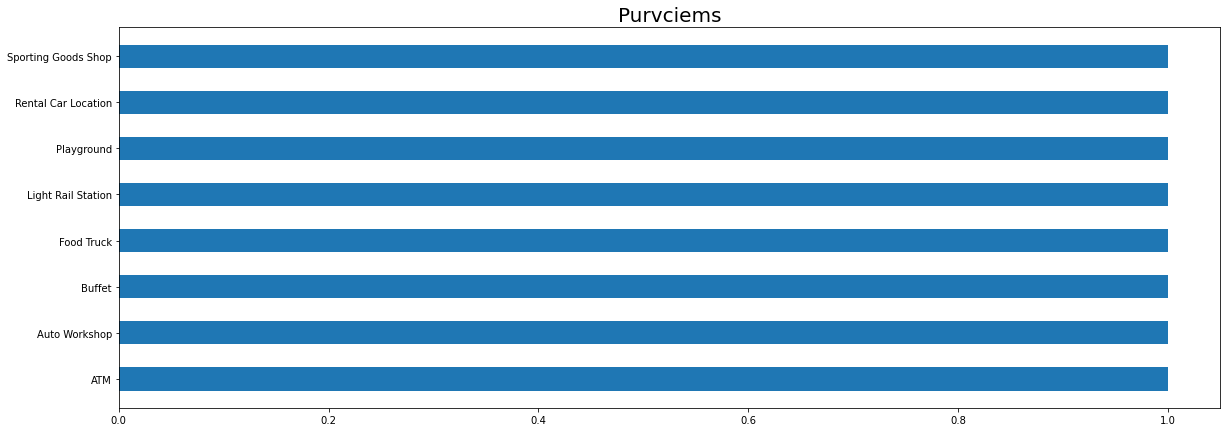

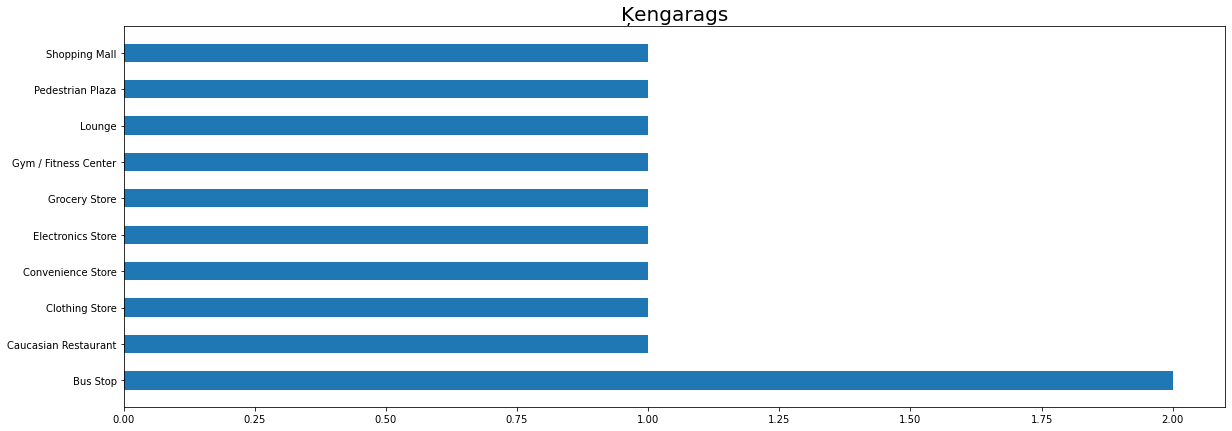

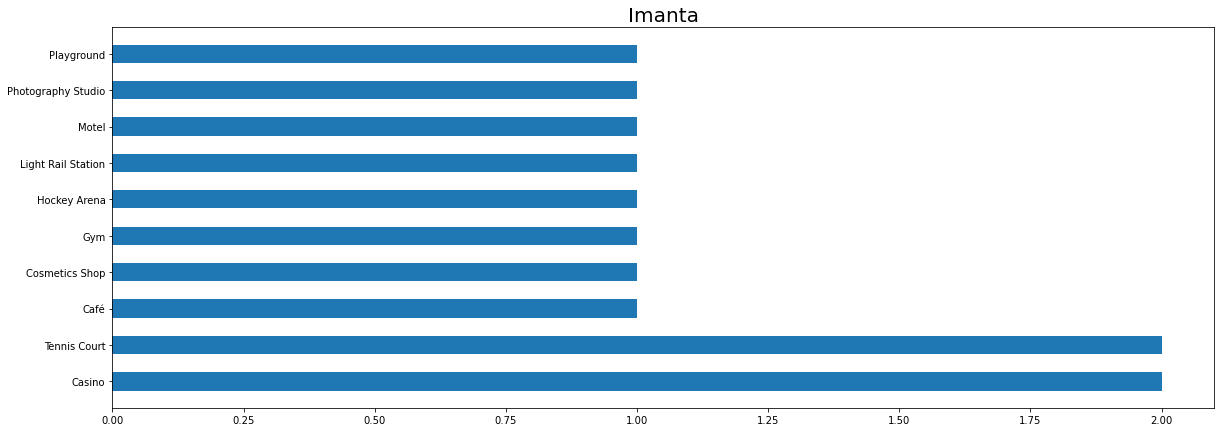

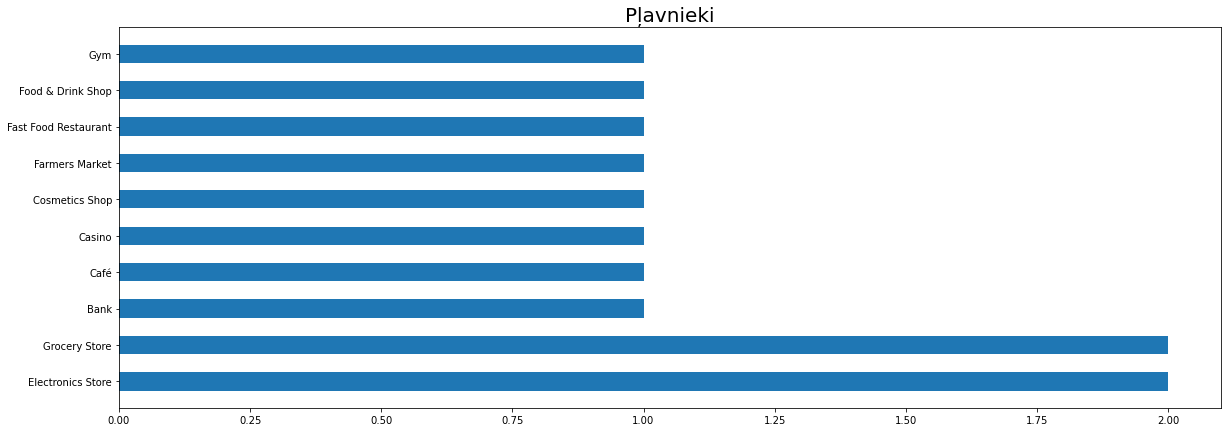

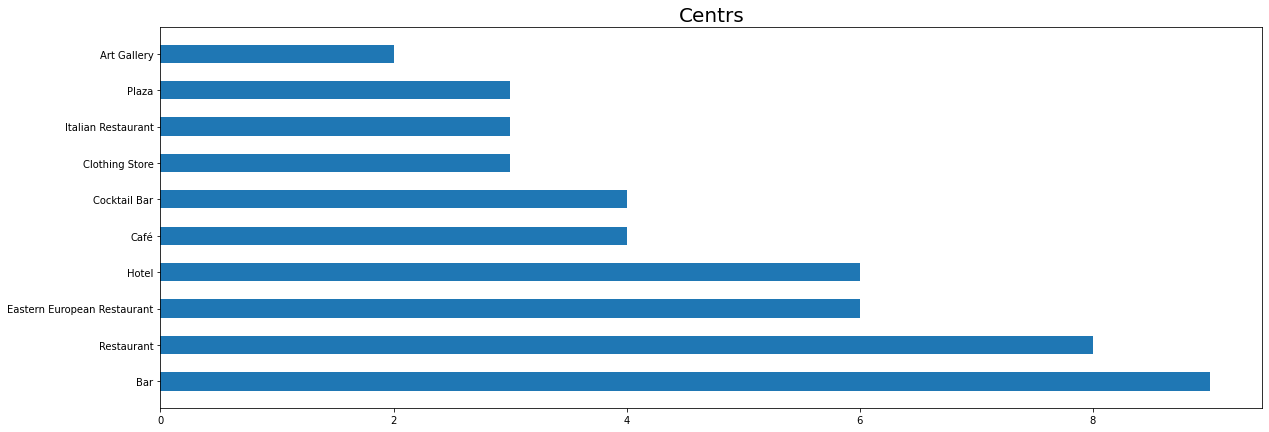

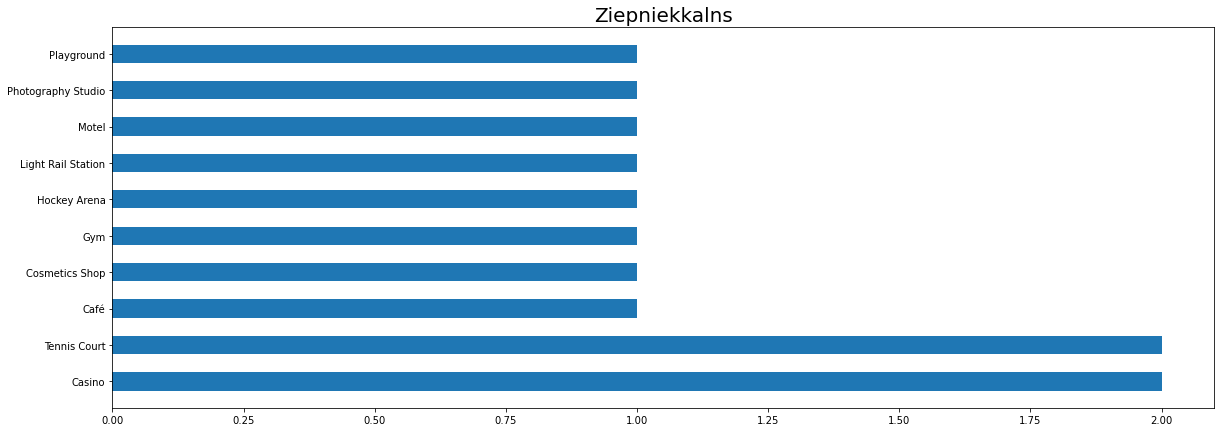

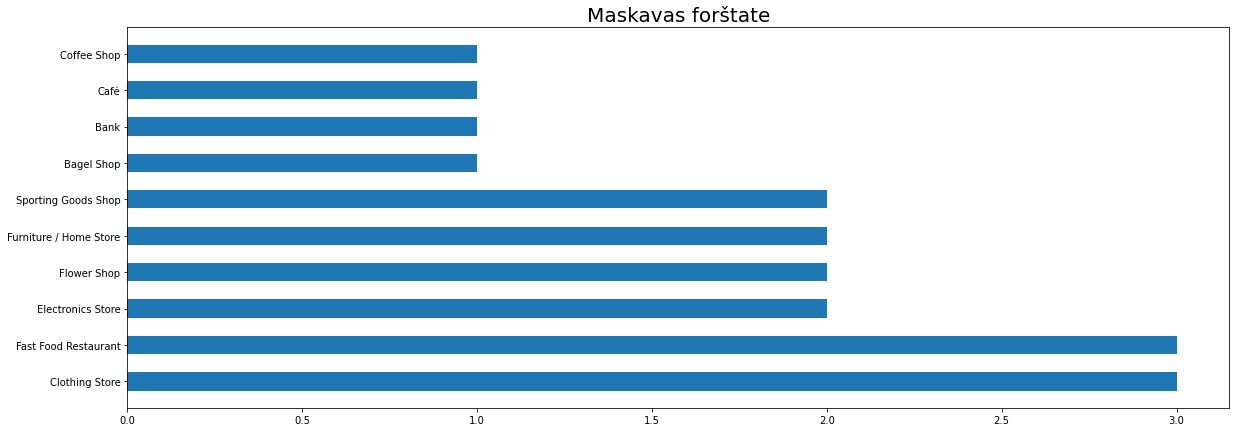

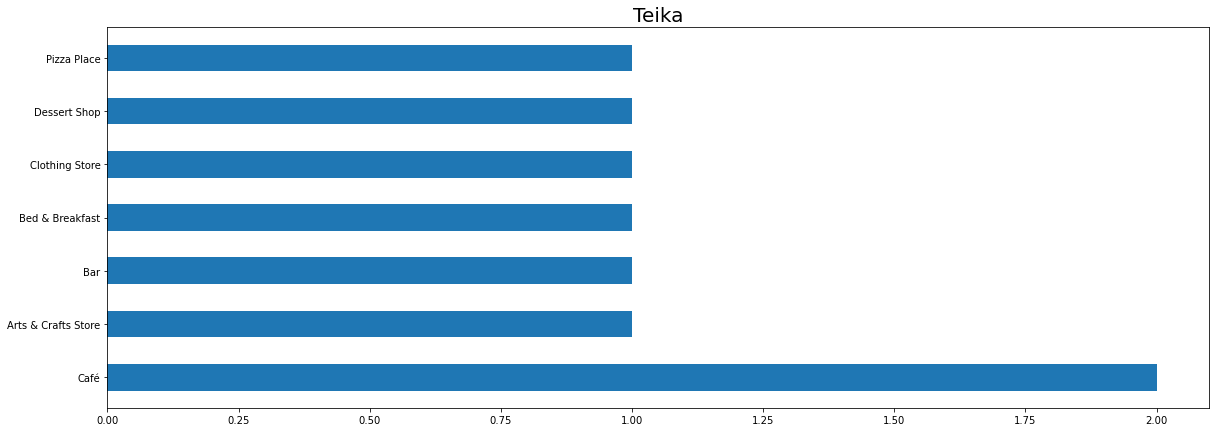

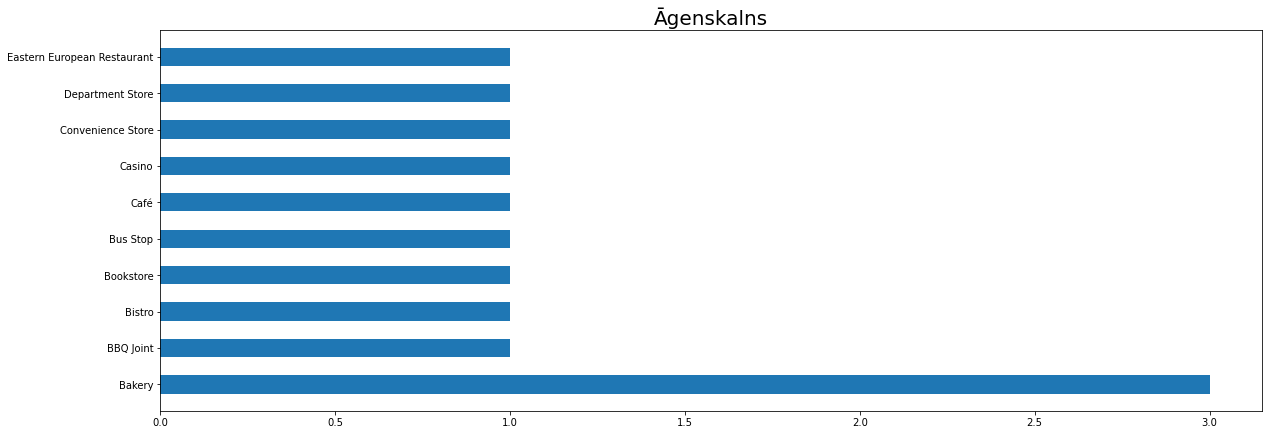

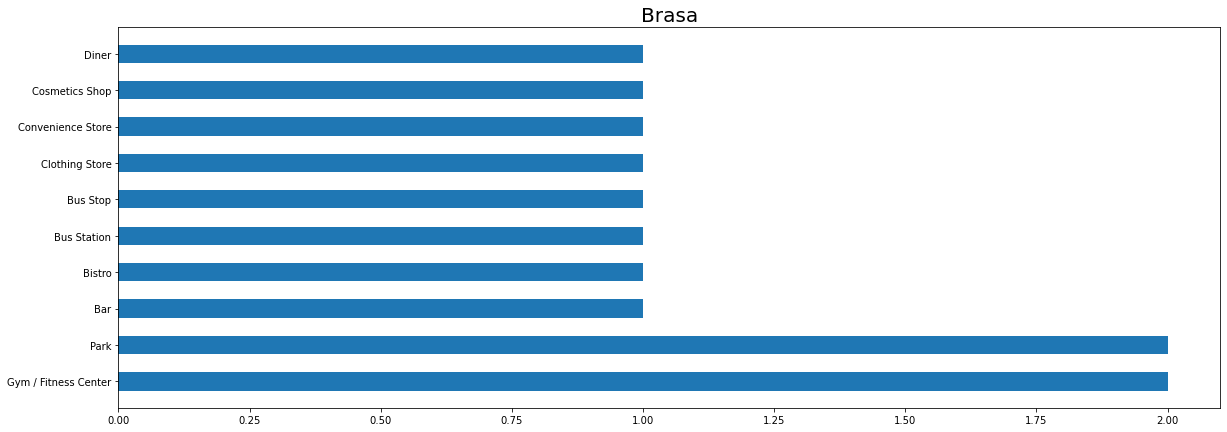

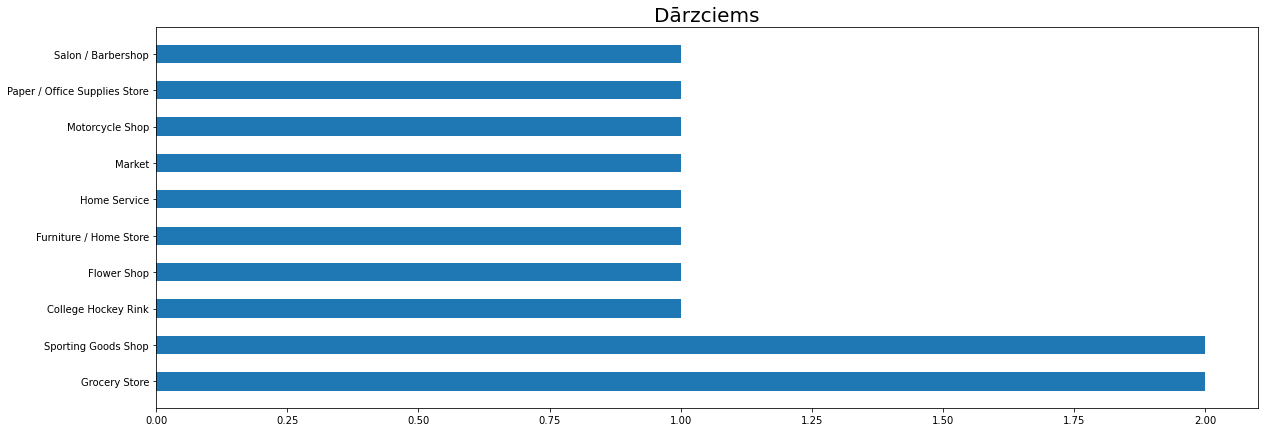

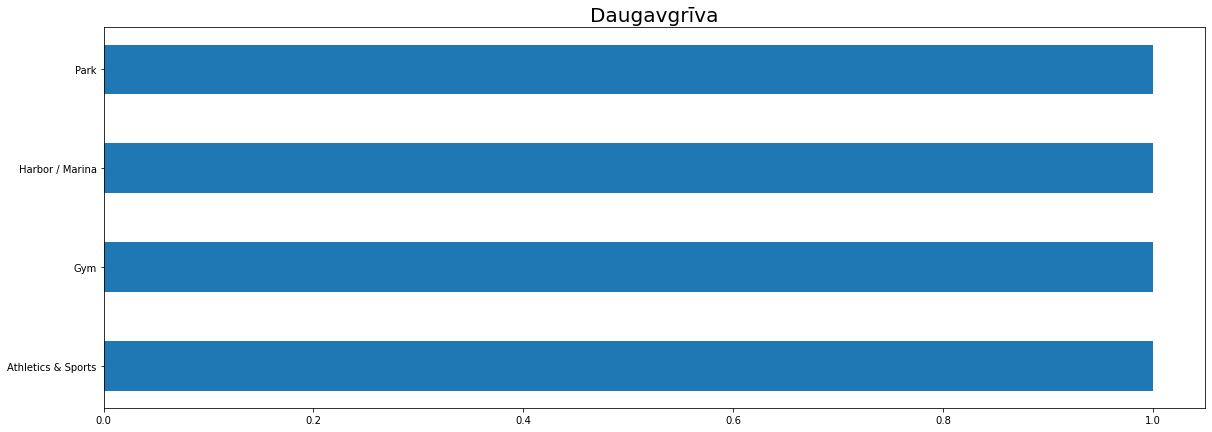

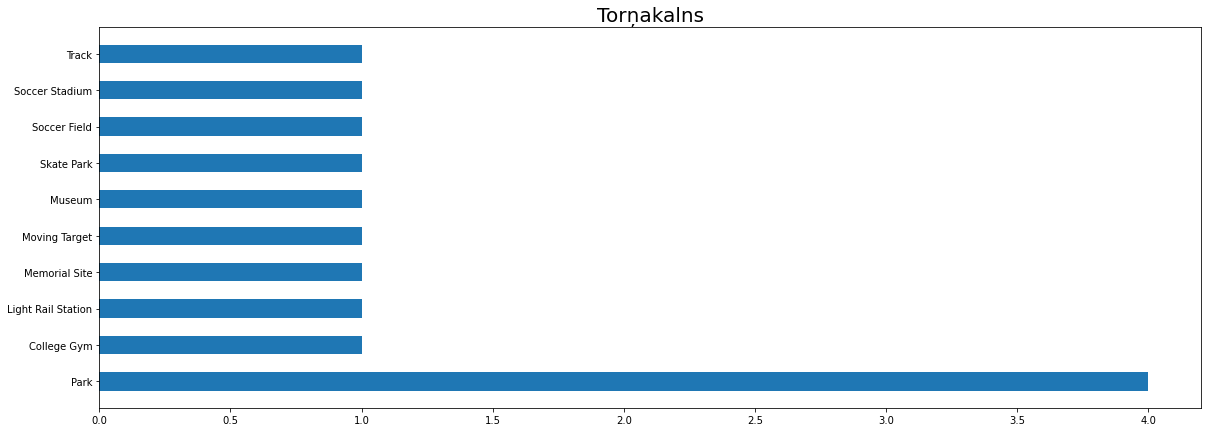

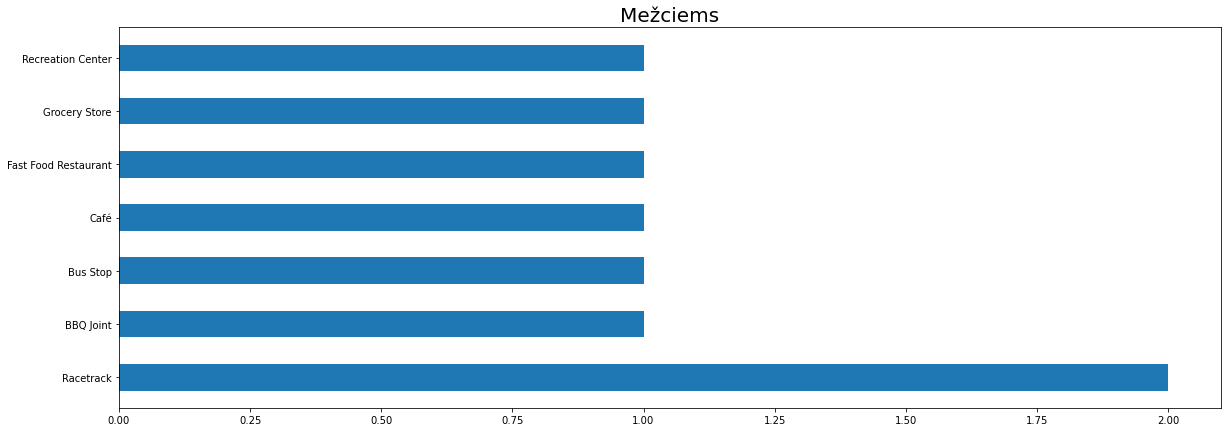

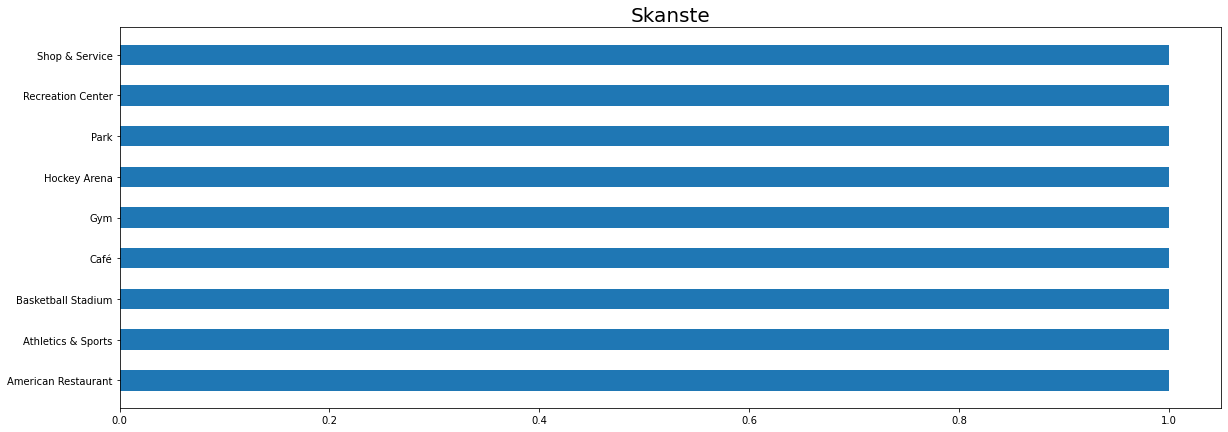

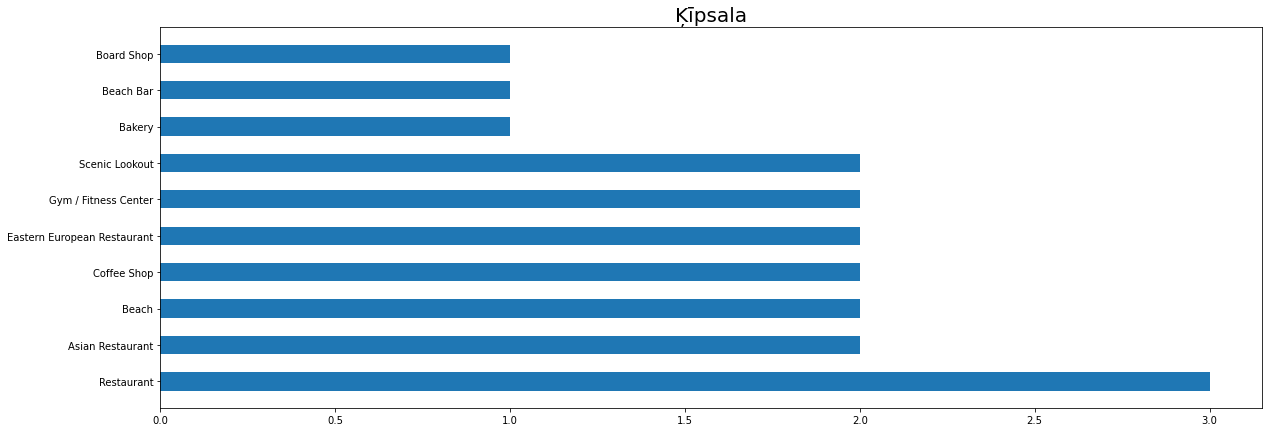

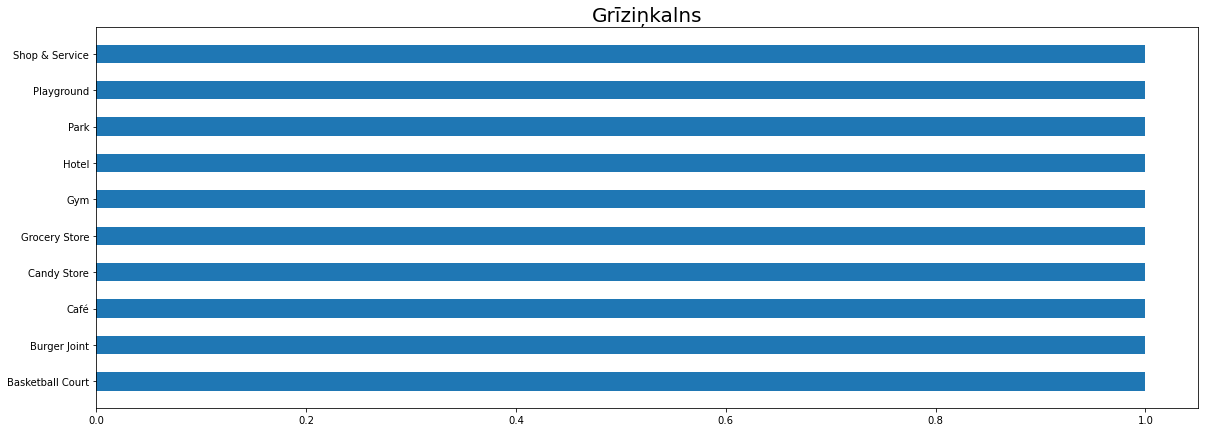

In [48]:
for title in riga_bor:
    venue_comparison_chart(Riga_venues,title)
    

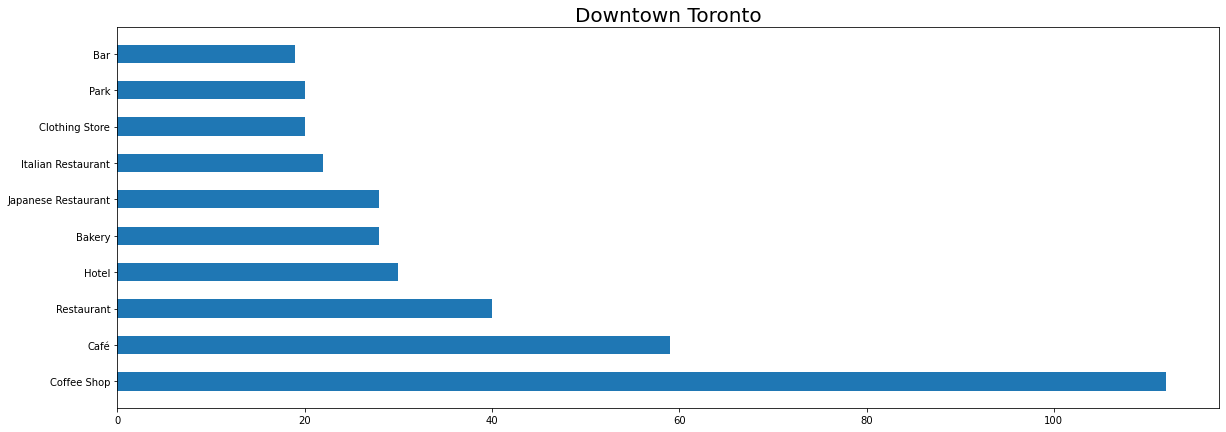

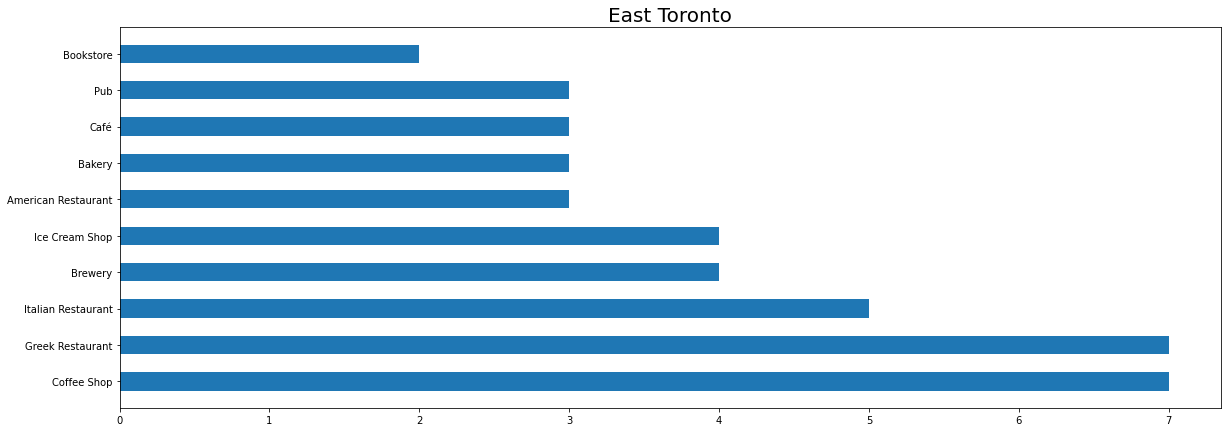

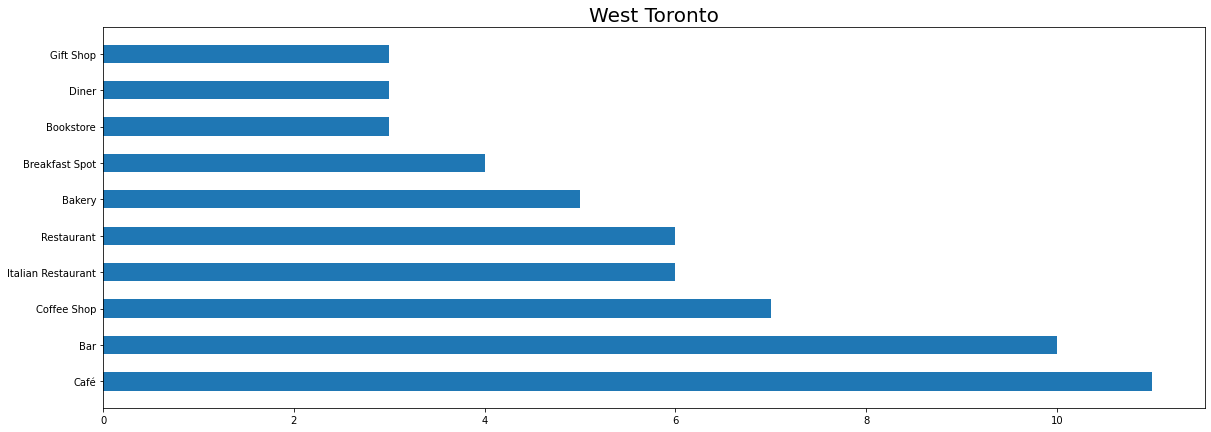

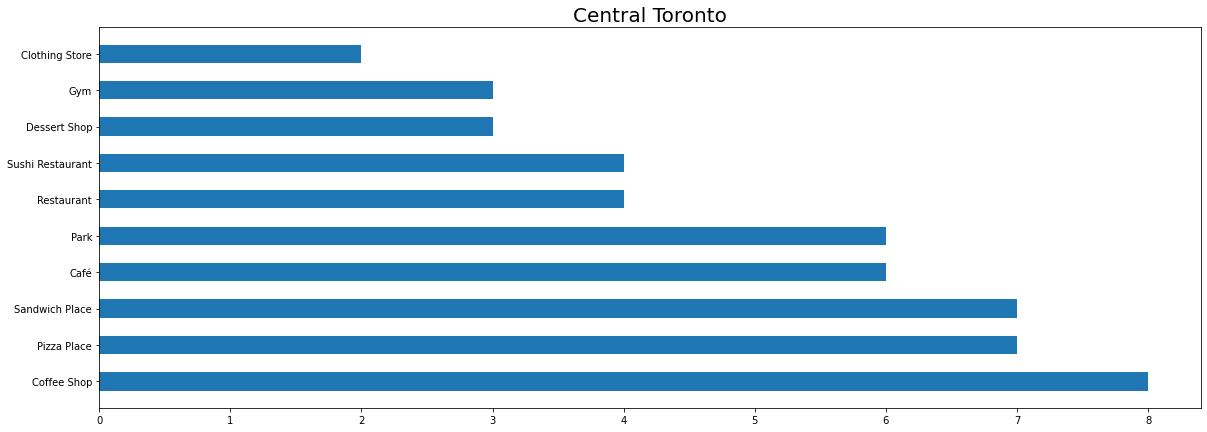

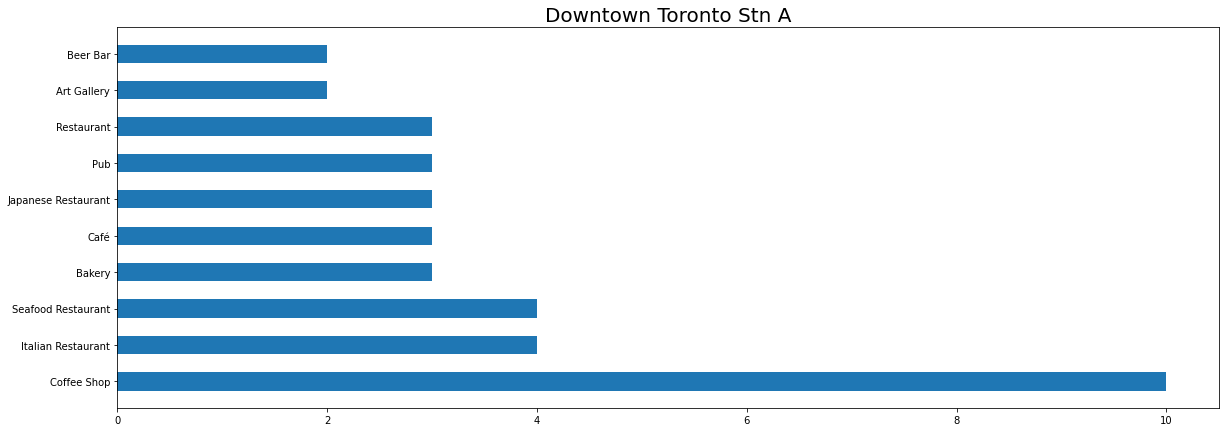

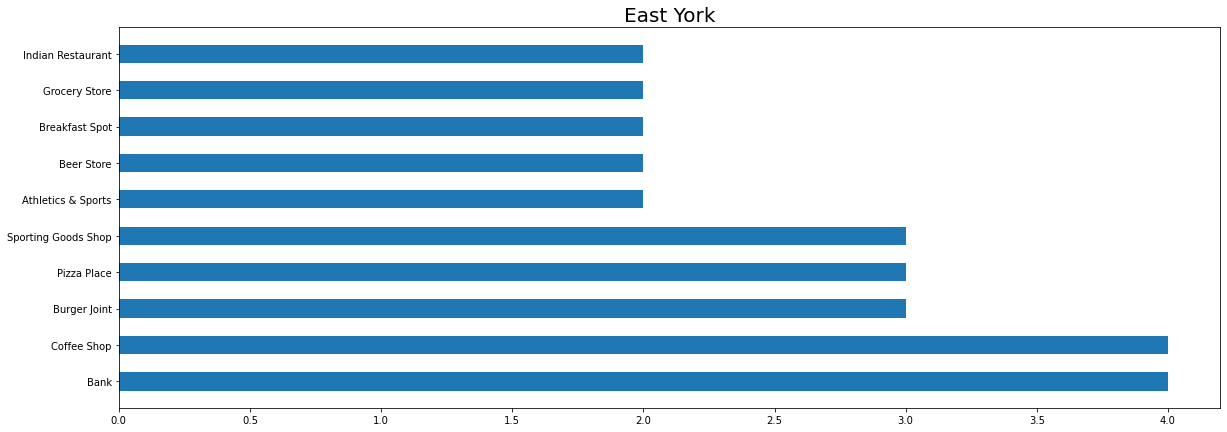

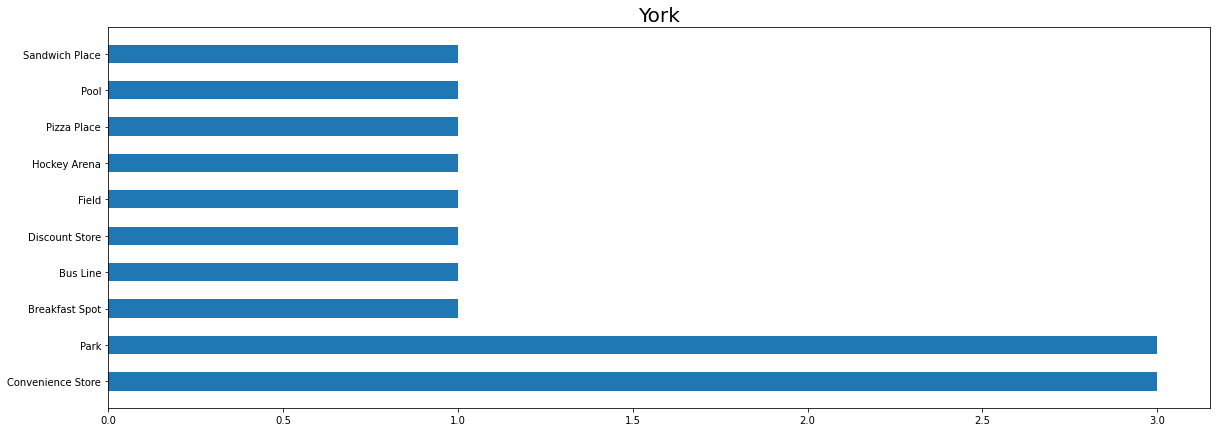

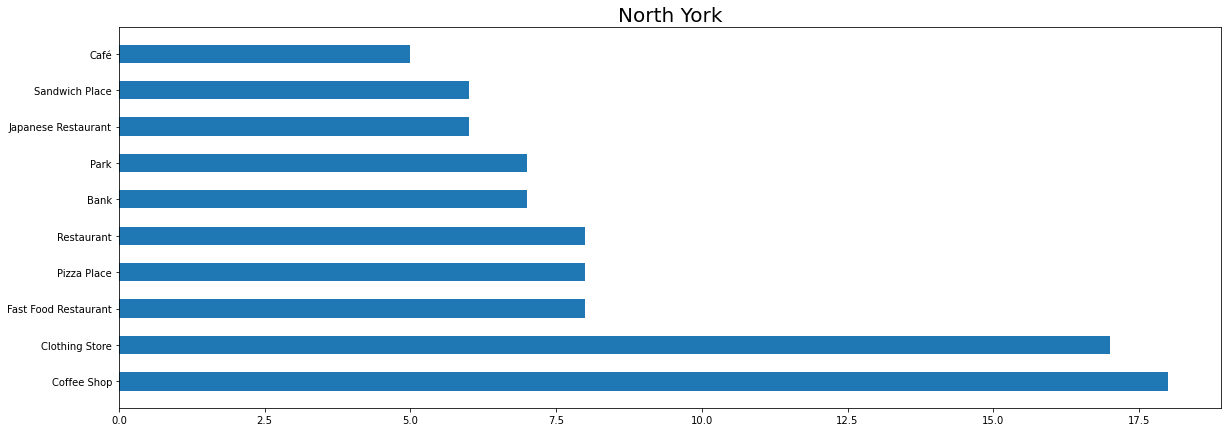

In [49]:
for title2 in toronto_bor:
    venue_comparison_chart(Toronto_venues,title2)

## one-hot encoding

In [50]:
Riga_onehot = pd.get_dummies(Riga_venues[['Venue Category']], prefix="", prefix_sep="")
Riga_onehot['Borough'] = Riga_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [Riga_onehot.columns[-1]] + list(Riga_onehot.columns[:-1])
Riga_onehot = Riga_onehot[fixed_columns]
Riga_onehot.head()
Riga_grouped = Riga_onehot.groupby('Borough').mean().reset_index()

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe for Riga
RigaBorough_venues_sorted = pd.DataFrame(columns=columns)
RigaBorough_venues_sorted['Borough'] = Riga_grouped['Borough']
for ind in np.arange(Riga_grouped.shape[0]):
    RigaBorough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Riga_grouped.iloc[ind, :], num_top_venues)
    

RigaBorough_venues_sorted.head(20)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Atgāzene,Bus Station,Grocery Store,Bus Stop,Pool,Arts & Crafts Store,Train Station,Athletics & Sports,Forest,Yoga Studio,Farm
1,Beberbeķi,Moving Target,Garden Center,Bus Stop,Bike Trail,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Event Space
2,Berģi,Bus Station,Beach,Auto Garage,Lake,Yoga Studio,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Event Space
3,Bieriņi,Trail,Bus Stop,Museum,Sculpture Garden,Neighborhood,Bakery,Track,Outdoor Sculpture,Bike Rental / Bike Share,Department Store
4,Bišumuiža,Karaoke Bar,Auto Garage,Yoga Studio,Diner,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Event Space,Electronics Store
5,Bolderāja,Bar,Pizza Place,Pharmacy,Turkish Restaurant,Food & Drink Shop,Fast Food Restaurant,Steakhouse,Gym,Café,Eastern European Restaurant
6,Brasa,Park,Gym / Fitness Center,Clothing Store,Bar,Pet Store,Convenience Store,Cosmetics Shop,Bus Stop,Restaurant,Bus Station
7,Brekši,Auto Garage,Art Gallery,Bar,Yoga Studio,Discount Store,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Event Space
8,Bukulti,Food & Drink Shop,Summer Camp,Dive Spot,Bus Station,Yoga Studio,Diner,Fast Food Restaurant,Farmers Market,Farm,Event Space
9,Centrs,Bar,Restaurant,Eastern European Restaurant,Hotel,Café,Cocktail Bar,Plaza,Italian Restaurant,Clothing Store,Modern European Restaurant


In [51]:

Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")
Toronto_onehot['Borough'] = Toronto_venues['Borough'] 

fixed_columns2 = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns2]
Toronto_onehot.head()
Toronto_grouped = Toronto_onehot.groupby('Borough').mean().reset_index()

TorontoBorough_venues_sorted = pd.DataFrame(columns=columns)
TorontoBorough_venues_sorted['Borough'] = Toronto_grouped['Borough']
for ind in np.arange(Toronto_grouped.shape[0]):
    TorontoBorough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

TorontoBorough_venues_sorted.head(20)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Coffee Shop,Pizza Place,Sandwich Place,Park,Café,Sushi Restaurant,Restaurant,Gym,Dessert Shop,Italian Restaurant
1,Downtown Toronto,Coffee Shop,Café,Restaurant,Hotel,Bakery,Japanese Restaurant,Italian Restaurant,Park,Clothing Store,Bar
2,Downtown Toronto Stn A,Coffee Shop,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Pub,Café,Bakery,Creperie,Cheese Shop
3,East Toronto,Coffee Shop,Greek Restaurant,Italian Restaurant,Ice Cream Shop,Brewery,Café,American Restaurant,Bakery,Pub,Bookstore
4,East Toronto Business,Light Rail Station,Comic Shop,Farmers Market,Restaurant,Brewery,Auto Workshop,Garden,Garden Center,Burrito Place,Fast Food Restaurant
5,East York,Coffee Shop,Bank,Burger Joint,Sporting Goods Shop,Pizza Place,Intersection,Park,Beer Store,Athletics & Sports,Skating Rink
6,East York/East Toronto,Intersection,Park,Convenience Store,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
7,Etobicoke,Pizza Place,Sandwich Place,Coffee Shop,Grocery Store,Bakery,Fast Food Restaurant,Café,Gym,Pharmacy,Liquor Store
8,Etobicoke Northwest,Truck Stop,Garden Center,Rental Car Location,Bar,Drugstore,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant
9,Mississauga,Coffee Shop,Hotel,Gym,American Restaurant,Fried Chicken Joint,Gas Station,Sandwich Place,Middle Eastern Restaurant,Intersection,Burrito Place


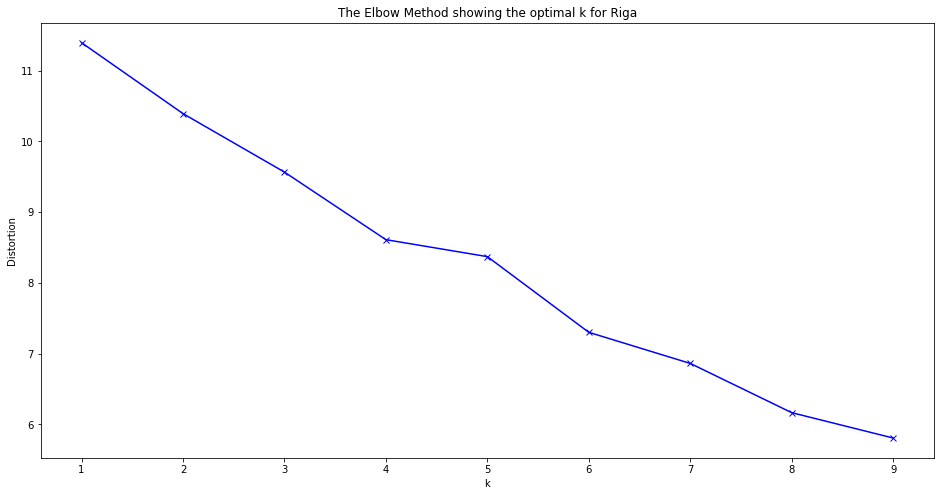

In [52]:
distortions = []
riga_grouped_clustering = Riga_grouped.drop(['Borough'], 1)
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(riga_grouped_clustering)
    distortions.append(kmeanModel.inertia_)
    
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Riga')
plt.show()

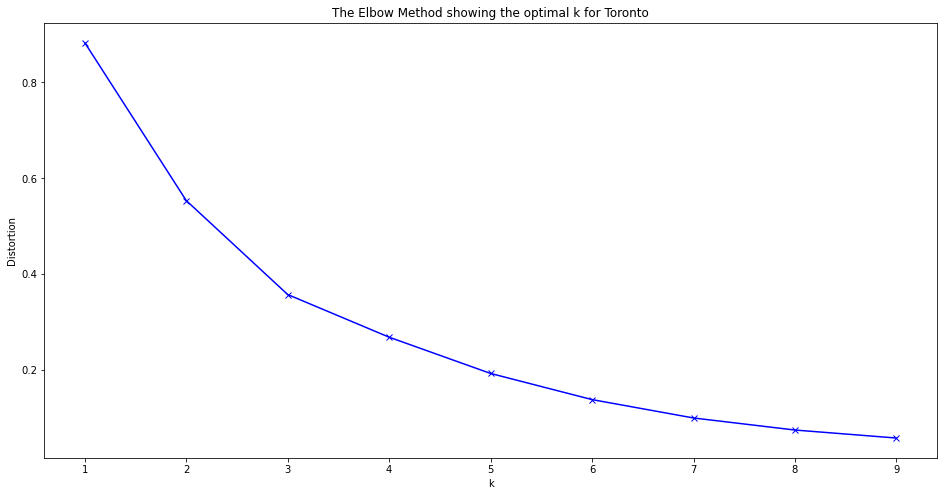

In [53]:
distortions = []
toronto_grouped_clustering = Toronto_grouped.drop(['Borough'], 1)
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(toronto_grouped_clustering)
    distortions.append(kmeanModel.inertia_)
    
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for Toronto')
plt.show()

In [54]:
#Riga
kmeans = KMeans(n_clusters=6, random_state=0).fit(riga_grouped_clustering)
kmeans.labels_[0:10] 
RigaBorough_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [55]:
#Toronto
kmeans2 = KMeans(n_clusters=6, random_state=0).fit(toronto_grouped_clustering)
kmeans2.labels_[0:10] 
TorontoBorough_venues_sorted.insert(0, 'Cluster Labels', kmeans2.labels_)

In [56]:
#merge
merged_Riga = pd.merge(RigaBorough_venues_sorted,riga_coor,on='Borough')
merged_Toronto = pd.merge(TorontoBorough_venues_sorted,toronto_coor,on='Borough') 

In [58]:
merged_Riga.head(20)

,Cluster Labels,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Area (km2),Population,Population density(people/km2),Neighborhood,Latitude,Longitude
0,1,Atgāzene,Bus Station,Grocery Store,Bus Stop,Pool,Arts & Crafts Store,Train Station,Athletics & Sports,Forest,Yoga Studio,Farm,745,1613,21651.0,Zemgales priekšpilsēta,56.917274,24.074537
1,5,Beberbeķi,Moving Target,Garden Center,Bus Stop,Bike Trail,Yoga Studio,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Event Space,1204,411,34136.0,Zemgales priekšpilsēta,56.950001,23.950001
2,1,Berģi,Bus Station,Beach,Auto Garage,Lake,Yoga Studio,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Event Space,5706,2942,5160.0,Vidzemes priekšpilsēta,56.983330,24.299999
3,1,Bieriņi,Trail,Bus Stop,Museum,Sculpture Garden,Neighborhood,Bakery,Track,Outdoor Sculpture,Bike Rental / Bike Share,Department Store,4274,9443,22094.0,Zemgales priekšpilsēta,56.919724,24.058611
4,0,Bišumuiža,Karaoke Bar,Auto Garage,Yoga Studio,Diner,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Event Space,Electronics Store,2243,2360,105216.0,Zemgales priekšpilsēta,56.909698,24.136101
5,1,Bolderāja,Bar,Pizza Place,Pharmacy,Turkish Restaurant,Food & Drink Shop,Fast Food Restaurant,Steakhouse,Gym,Café,Eastern European Restaurant,8329,12994,156009.0,Kurzemes priekšpilsēta,57.033333,24.049999
6,1,Brasa,Park,Gym / Fitness Center,Clothing Store,Bar,Pet Store,Convenience Store,Cosmetics Shop,Bus Stop,Restaurant,Bus Station,1741,13241,76054.0,Vidzemes priekšpilsēta,56.973110,24.141119
7,0,Brekši,Auto Garage,Art Gallery,Bar,Yoga Studio,Discount Store,Fish Market,Fast Food Restaurant,Farmers Market,Farm,Event Space,2039,1751,85875.0,Vidzemes priekšpilsēta,56.966362,24.303980
8,1,Bukulti,Food & Drink Shop,Summer Camp,Dive Spot,Bus Station,Yoga Studio,Diner,Fast Food Restaurant,Farmers Market,Farm,Event Space,5183,675,13023.0,Vidzemes priekšpilsēta,57.000000,24.267000
9,1,Centrs,Bar,Restaurant,Eastern European Restaurant,Hotel,Café,Cocktail Bar,Plaza,Italian Restaurant,Clothing Store,Modern European Restaurant,3732,35274,945177.0,Centra rajons/Latgales priekšpilsēta/Vidzemes ...,56.946285,24.105078


In [59]:
# create map
map_clusters = folium.Map(location=[56.946285,24.105078],zoom_start=10)

# set rainbow color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighborhood, cluster in zip(merged_Riga['Latitude'], merged_Riga['Longitude'], merged_Riga['Neighborhood'], merged_Riga['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [60]:
# create map
map_clusters2 = folium.Map(location=[43.654260,-79.360636],zoom_start=10)

# set rainbow color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighborhood, cluster in zip(merged_Toronto['Latitude'], merged_Toronto['Longitude'], merged_Toronto['Neighborhood'], merged_Toronto['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

In [61]:
sorted_m_riga = merged_Riga.sort_values(by='Population', ascending=False)
sorted_m_riga.head(15)

,Cluster Labels,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Area (km2),Population,Population density(people/km2),Neighborhood,Latitude,Longitude
29,1,Purvciems,ATM,Sporting Goods Shop,Playground,Rental Car Location,Food Truck,Auto Workshop,Light Rail Station,Buffet,Diner,Farm,5017,59940,1194738.0,Vidzemes priekšpilsēta,56.949997,24.166666
50,1,Ķengarags,Bus Stop,Train Station,Electronics Store,Shopping Mall,Lounge,Grocery Store,Pedestrian Plaza,Gym / Fitness Center,Clothing Store,Convenience Store,5190,50287,968921.0,Latgales priekšpilsēta,56.921581,24.181730
16,1,Imanta,Casino,Tennis Court,Hockey Arena,Gym,Photography Studio,Café,Cosmetics Shop,Motel,Light Rail Station,Playground,9003,47310,525492.0,Kurzemes priekšpilsēta,56.949997,24.000000
31,1,Pļavnieki,Grocery Store,Electronics Store,Café,Farmers Market,Food & Drink Shop,Park,Bank,Gym,Fast Food Restaurant,Casino,2985,47185,1580737.0,Latgales priekšpilsēta,56.939999,24.207779
9,1,Centrs,Bar,Restaurant,Eastern European Restaurant,Hotel,Café,Cocktail Bar,Plaza,Italian Restaurant,Clothing Store,Modern European Restaurant,3732,35274,945177.0,Centra rajons/Latgales priekšpilsēta/Vidzemes ...,56.946285,24.105078
46,1,Ziepniekkalns,Casino,Tennis Court,Hockey Arena,Gym,Photography Studio,Café,Cosmetics Shop,Motel,Light Rail Station,Playground,10917,33016,302427.0,Zemgales priekšpilsēta,56.950001,24.000000
23,1,Maskavas forštate,Fast Food Restaurant,Clothing Store,Electronics Store,Flower Shop,Sporting Goods Shop,Furniture / Home Store,Café,Cosmetics Shop,Sushi Restaurant,Shopping Mall,7594,31918,420306.0,Latgales priekšpilsēta,56.933193,24.144806
38,1,Teika,Café,Pizza Place,Clothing Store,Arts & Crafts Store,Bed & Breakfast,Dessert Shop,Bar,Yoga Studio,Dive Spot,Fish Market,4682,29990,640538.0,Vidzemes priekšpilsēta,56.970001,24.180000
48,1,Āgenskalns,Bakery,Hotel,Bus Stop,Spa,Fast Food Restaurant,Bookstore,Farmers Market,Eastern European Restaurant,Café,Medical Center,4613,27923,605311.0,Kurzemes priekšpilsēta/Zemgales priekšpilsēta,56.933331,24.066666
19,1,Jugla,Bus Stop,Pizza Place,Kebab Restaurant,Fast Food Restaurant,Fish Market,Beach,Café,Bakery,Recreation Center,BBQ Joint,14099,25518,180992.0,Vidzemes priekšpilsēta,56.986000,24.243000
